<a href="https://colab.research.google.com/github/Sujal350/I-PINN/blob/main/Copy_of_I_PINNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def exact_solution(d, w0, t):
  w = np.sqrt(w0**2 - d**2)
  phi = np.arctan(-d/w)
  A = 1/(2*np.cos(phi))
  print("w = ",w)
  print("phi = ",phi)
  print("A = ",A)
  # cos  = np.cos(phi + w*t_test) why not t-test and here t is time that will be tensor
  cos  = torch.cos(phi + w*t)
  exp = torch.exp(-d*t)
  print("Cos = ",cos)
  print("exp = ",exp)
  u = exp*2*A*cos    # exp and cos are already tensor   find what it means
  return u

In [ ]:
#Considering mass i.e m = 1
d = 2
w0 = 20
mu = 2*d
k = w0**2
t_test = torch.linspace(0,1,300).view(-1,1)

In [ ]:
u_exact = exact_solution(d, w0, t_test)

w =  19.8997487421324
phi =  -0.1001674211615598
A =  0.502518907629606
Cos =  tensor([[ 0.9950],
        [ 0.9994],
        [ 0.9995],
        [ 0.9951],
        [ 0.9862],
        [ 0.9731],
        [ 0.9556],
        [ 0.9339],
        [ 0.9080],
        [ 0.8781],
        [ 0.8444],
        [ 0.8069],
        [ 0.7658],
        [ 0.7214],
        [ 0.6737],
        [ 0.6231],
        [ 0.5697],
        [ 0.5137],
        [ 0.4555],
        [ 0.3953],
        [ 0.3334],
        [ 0.2699],
        [ 0.2053],
        [ 0.1398],
        [ 0.0736],
        [ 0.0071],
        [-0.0594],
        [-0.1257],
        [-0.1914],
        [-0.2562],
        [-0.3199],
        [-0.3822],
        [-0.4429],
        [-0.5015],
        [-0.5579],
        [-0.6119],
        [-0.6631],
        [-0.7114],
        [-0.7566],
        [-0.7984],
        [-0.8367],
        [-0.8713],
        [-0.9020],
        [-0.9287],
        [-0.9513],
        [-0.9697],
        [-0.9838],
        [-0.9935],
        [

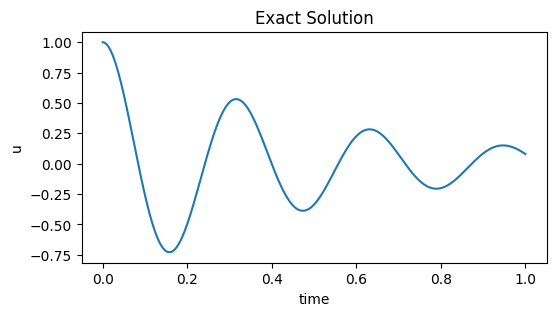

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(t_test[:,0], u_exact[:,0])
plt.xlabel("time")
plt.ylabel("u")
plt.title("Exact Solution")
plt.show()

# Data generation since I-PINNS reqiure data and PINNS do not

**Using I-PINN we have to predict correct value of mu**

In [ ]:
torch.manual_seed(123)
d, w0 = 2, 20
print("mu correct value = ", 2*d)
t_obs = torch.rand(40).view(-1,1)
u_obs = exact_solution(d, w0, t_obs)
print("T observation = ", t_obs)
print("U observation = ", u_obs)

mu correct value =  4
w =  19.8997487421324
phi =  -0.1001674211615598
A =  0.502518907629606
Cos =  tensor([[ 0.8820],
        [-0.7286],
        [ 0.1944],
        [ 0.5100],
        [ 0.1976],
        [-0.1349],
        [-0.8659],
        [-0.3601],
        [-0.9127],
        [-0.2170],
        [ 0.9940],
        [ 0.5346],
        [ 0.1651],
        [-0.7830],
        [ 0.9962],
        [-0.0404],
        [-0.6354],
        [-0.7919],
        [ 0.3436],
        [ 0.8883],
        [-0.3830],
        [ 0.6502],
        [ 1.0000],
        [ 0.8229],
        [ 0.6051],
        [ 0.9069],
        [ 0.6522],
        [-0.3130],
        [ 0.4947],
        [ 0.7800],
        [ 0.8746],
        [-0.4473],
        [-0.0483],
        [ 0.1902],
        [ 0.7462],
        [-0.6303],
        [ 0.1353],
        [ 0.7574],
        [-0.9555],
        [-0.4690]])
exp =  tensor([[0.5531],
        [0.3559],
        [0.6045],
        [0.2523],
        [0.8625],
        [0.1767],
        [0.7610],
     

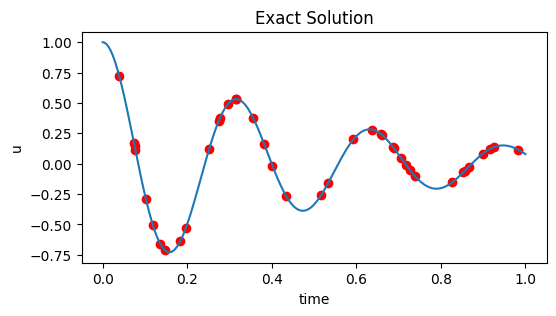

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(t_test[:,0], u_exact[:,0])
plt.scatter(t_obs[:,0], u_obs[:,0], color="red")
plt.xlabel("time")
plt.ylabel("u")
plt.title("Exact Solution")
plt.show()

 **The red color are our data points**

# Develop I-PINNS

In [ ]:
class FFN(nn.Module):
  def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN):
    super().__init__()    # This takes nn.Module and pass it through def__init__
    activation = nn.Tanh
    self.ffni = nn.Sequential(nn.Linear(N_INPUT, N_HIDDEN), activation())
    self.ffnh = nn.Sequential(nn.Linear(N_HIDDEN, N_HIDDEN), activation())
    self.ffne = nn.Sequential(nn.Linear(N_HIDDEN, N_OUTPUT))

  def forward(self, x):     #Here x can be any value in our case its time
    x = self.ffni(x)
    x = self.ffnh(x)
    x = self.ffnh(x)       # You can add as much hidden layer as you want
    x = self.ffne(x)
    return x

In [ ]:
torch.manual_seed(123)
pinn = FFN(1,1,32)

In [ ]:
pinn

FFN(
  (ffni): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): Tanh()
  )
  (ffnh): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Tanh()
  )
  (ffne): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
#Creating Domian points
t_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)     #These are the physical points

# Here is the difference between PINN and I-PINN

In [ ]:
mu = torch.nn.Parameter(torch.zeros(1, requires_grad=True))   # Pytroch will understand that mu here is new parameter product
# Parameter to optimize and give correct value

In [ ]:
mus = []

In [ ]:
optimiser = torch.optim.Adam(list(pinn.parameters())+[mu], lr=1e-3)

In [ ]:
# d = 2
w0 = 20
# mu = 2*d
k = w0**2

# We commented those beacuse that has to found by model during training

# Start the training process

Loss1 = tensor(5175.8457, grad_fn=<MeanBackward0>) Loss2 = tensor(0.1299, grad_fn=<MeanBackward0>)


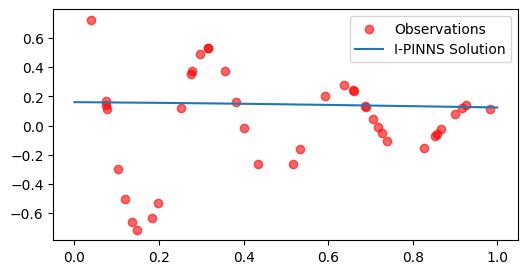

Loss1 = tensor(110.3898, grad_fn=<MeanBackward0>) Loss2 = tensor(0.0782, grad_fn=<MeanBackward0>)


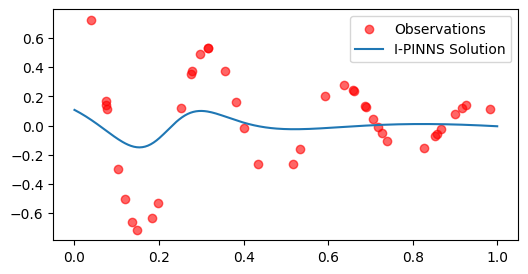

Loss1 = tensor(29.9420, grad_fn=<MeanBackward0>) Loss2 = tensor(0.0050, grad_fn=<MeanBackward0>)


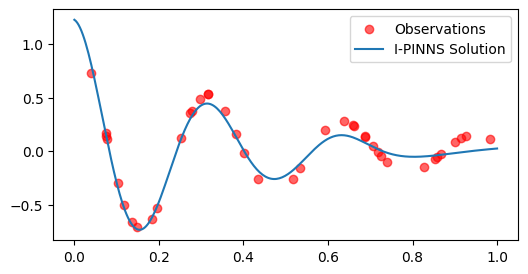

Loss1 = tensor(9.6011, grad_fn=<MeanBackward0>) Loss2 = tensor(0.0015, grad_fn=<MeanBackward0>)


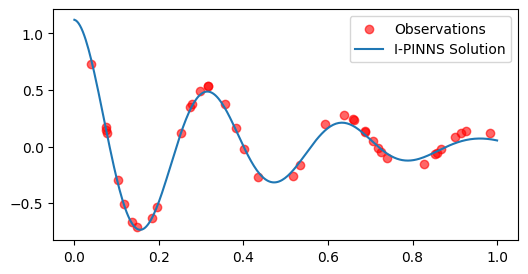

Loss1 = tensor(3.8096, grad_fn=<MeanBackward0>) Loss2 = tensor(7.2121e-05, grad_fn=<MeanBackward0>)


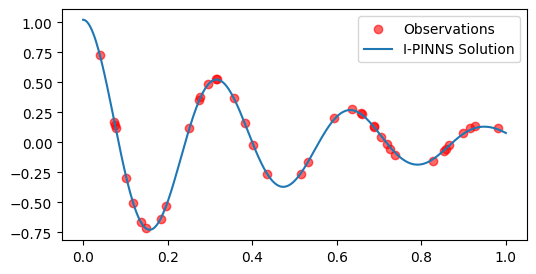

Loss1 = tensor(2.9614, grad_fn=<MeanBackward0>) Loss2 = tensor(3.8280e-05, grad_fn=<MeanBackward0>)


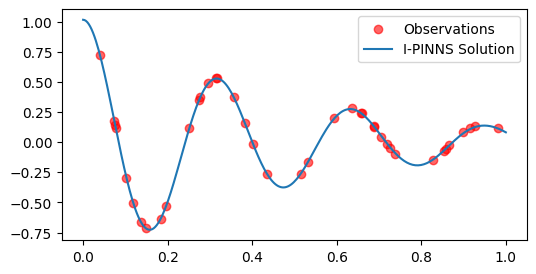

Loss1 = tensor(40.1504, grad_fn=<MeanBackward0>) Loss2 = tensor(0.0002, grad_fn=<MeanBackward0>)


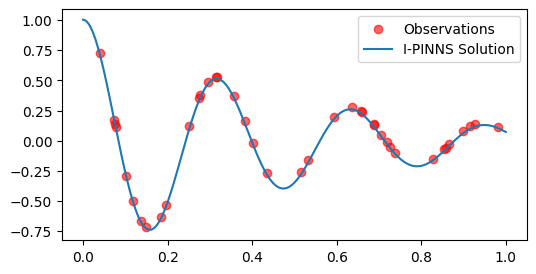

Loss1 = tensor(1.4057, grad_fn=<MeanBackward0>) Loss2 = tensor(6.9846e-06, grad_fn=<MeanBackward0>)


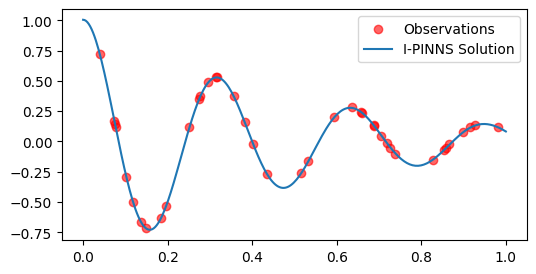

Loss1 = tensor(1.0427, grad_fn=<MeanBackward0>) Loss2 = tensor(3.7833e-06, grad_fn=<MeanBackward0>)


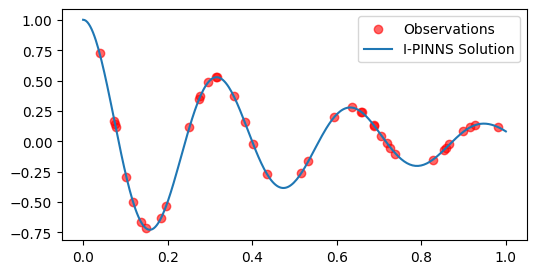

In [ ]:
for i in range(40001):
  optimiser.zero_grad()                   #Always we have a zero grad at the start Mandetory
  lambda1 = 1e4           # Weight inorder to balance the loss2,loss3

  # Physics loss
  u = pinn(t_physics)
  dudt = torch.autograd.grad(u, t_physics, torch.ones_like(u), create_graph=True)[0]
  d2udt2 = torch.autograd.grad(dudt, t_physics, torch.ones_like(dudt), create_graph=True)[0]
  loss1 = torch.mean((d2udt2 + mu*dudt + k*u)**2)   # mass=1 mx.. + mu*x. +ku     # We have many points that why we take mean   HERE IS THE DIFFERENTIAL EQUATION (DE)
  # To ensure we get positive value thats why we square here , but before we did absolute . So we can use abs but we dont want huge number so we prefer squaring it

  u = pinn(t_obs)
  loss2 = torch.mean((u - u_obs)**2)

  loss = loss1+loss2*lambda1          # Inital BC loss + AT t=0 speed=0 + Loss of physics i.e DE(Differential Equation) loss

  loss.backward()
  optimiser.step()

  mus.append(mu.item())

  if i%5000 == 0:  # Plot at every 5000 steps
    print("Loss1 =", loss1, "Loss2 =", loss2)
    u = pinn(t_test)
    u = u.detach()              # To get u values
    plt.figure(figsize=(6,3))
    plt.scatter(t_obs[:,0], u_obs[:,0], label="Observations", color='red', alpha=0.6)    #Alpha to make it transperent
    plt.plot(t_test[:,0], u[:,0], label="I-PINNS Solution", color="tab:blue")
    plt.legend()
    plt.show()

In [ ]:
print("MU final value=",mu.item())

MU final value= 4.048262596130371


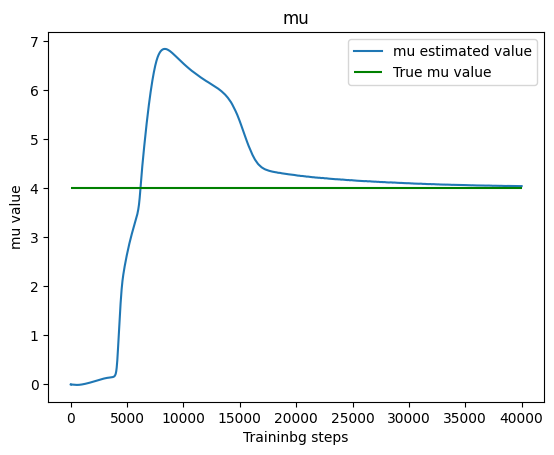

In [ ]:
plt.figure()
plt.title("mu")
plt.plot(mus, label="mu estimated value")
plt.hlines(2*d, 0, len(mus), label="True mu value", color="green")
plt.legend()
plt.xlabel("Traininbg steps")
plt.ylabel("mu value")
plt.show()